# Pytorch Session 2: Linear regression

In [21]:
import torch
import numpy as np

## 1. Data Generation:


Let us create the following expressions:


$b=-1,w=2$

$\hat{y}=wx+b$


First, define the parameters:


In [22]:
import torch
w0 = torch.tensor(2.0)
b0 = torch.tensor(-1.0)

In [23]:
torch.manual_seed(2021)
X = torch.arange(-3,3, 0.3).view(-1, 1)
f = w0*X+b0
print(X.shape, f.shape)

torch.Size([20, 1]) torch.Size([20, 1])


In [24]:
Y = f + torch.randn(f.shape)

In [25]:
print(X.shape, Y.shape)

torch.Size([20, 1]) torch.Size([20, 1])


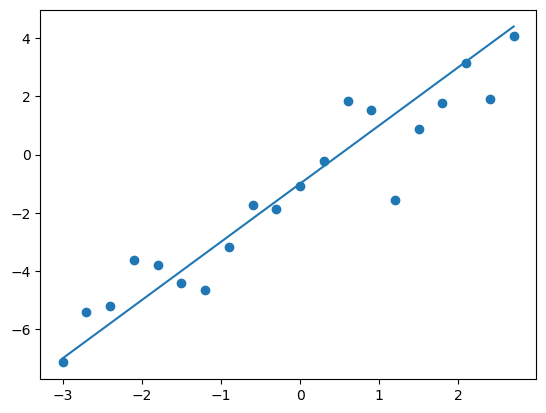

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X.numpy(),Y.numpy())
plt.plot(X.numpy(),f.numpy())

## 2. Linear regression model

You are given X and Y.

Your goal is to find the best linear model to explain the relation between X and Y by minimizing the following

$Loss(w, b)=\sum\limits_{i=1}^{n}(Y_i-Yhat_i)^2$

where

$Yhat_i:=X_i*w +b$.

In [27]:
def forward(x):
  return x*w+b

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

w = torch.tensor(torch.randn([1,1]), requires_grad=True)
b = torch.tensor(torch.randn([1,1]), requires_grad=True)


/var/folders/vl/yt67rw7s1tl_87hvr6bgvvw00000gn/T/ipykernel_12403/1239943648.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(torch.randn([1,1]), requires_grad=True)
/var/folders/vl/yt67rw7s1tl_87hvr6bgvvw00000gn/T/ipykernel_12403/1239943648.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(torch.randn([1,1]), requires_grad=True)


In [40]:
history=[]
lr=0.1
for epoch in range(100):
  Yhat = forward(X)
  loss = criterion(Yhat,Y)
  history.append(loss.item())
  loss.backward()
  w.data = w.data-lr*w.grad.data
  b.data = b.data-lr*b.grad.data
  w.grad = None
  b.grad = None




In [41]:
print(w, b)

tensor([[1.7149]], requires_grad=True) tensor([[-1.1823]], requires_grad=True)


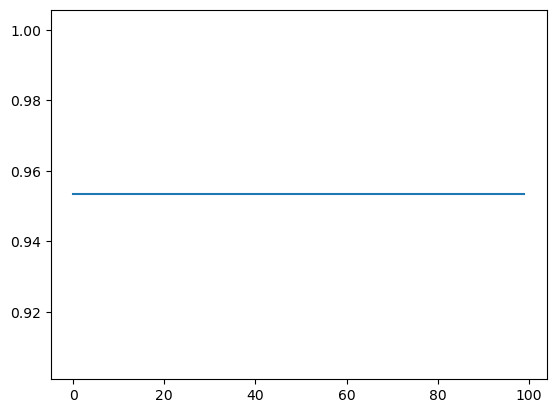

In [42]:
plt.plot(history)

### 2.1 Further consideration: `torch.optim.SGD`

Using the following optimizer
`my_optimizer = torch.optim.SGD([w,b], lr=0.1)`, we can excute a gradient descent one time by the following command:

1> Gradient descent

`my_optimizer.step()`

which is equivalent with
` w.data = w.data-lr*w.grad.data`

`b.data = b.data-lr*b.grad.data`

2> Making zero-grad before differentiation

`my_optimizer.zero_grad()`

which is equivalent with

`w.grad = None`

`b.grad = None`

### Exercise 2.1.1

Train the same model above using `torch.optim.SGD` function.

## 3. Stochastic Gradient Descent (SGD) using Dataset and DataLoader

In [43]:
# Import libraries
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

Now, for educational purpose, let's include intercept in the model matrix `X`. For this, you can use the following command.

In [44]:
ones = torch.ones([X.shape[0],1])
XX = torch.concat([ones, X], axis=1)

In [45]:
dataset = TensorDataset(XX,Y)

In [46]:
trainloader=DataLoader(dataset = dataset, batch_size=5, shuffle=True)

In [47]:
from torch import optim

In [48]:
beta = torch.tensor(torch.randn([2,1]), requires_grad=True)
def model(x):
    return x @ beta

#torch.nn.Linear(1, 1, bias=True)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
my_optimizer = torch.optim.SGD([beta], lr=0.1)
#optim.SGD(model.parameters(), lr=0.1)

/var/folders/vl/yt67rw7s1tl_87hvr6bgvvw00000gn/T/ipykernel_12403/2309595000.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(torch.randn([2,1]), requires_grad=True)


In [49]:
epochs=100
history=[]
n=len(XX)

for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat = model(xx)
    loss = criterion(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
  history.append(LOSS_sum.item()/n)


Here, make sure you understand how `loss` is defined.

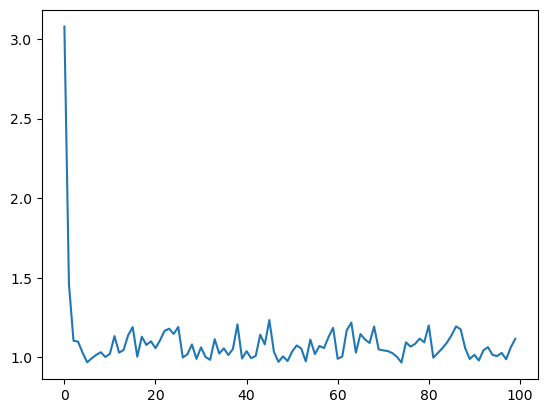

In [50]:
plt.plot(history)

In [39]:
beta

tensor([[-1.1659],
        [ 1.5250]], requires_grad=True)

### Prediction of the model

For $x=3.0$ our prediction for $y$ can be calculated as
```
xx=torch.tensor([[1, 3.0]])
model(xx)
```

### 3.1 Pytorch function of `model`

```
def model(x):
    return x @ beta
```
can be replaced by
```
model = torch.nn.Linear(2, 1, bias=false)
```
where `2` means the dimension of the input. In our case, input `XX` has two columns so that we have the dimension of the input is `2`.

### 3.1.1 Example:

The following code the rewriting of the above training procedure where model is defined by `torch.nn.Linear`.

In [ ]:
model = torch.nn.Linear(2, 1, bias=True)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
my_optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

<ipython-input-27-8f055009decb>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(torch.randn([2,1]), requires_grad=True)


In [ ]:
epochs=100
history=[]
n=len(XX)

for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat = model(xx)
    loss = criterion(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
  history.append(LOSS_sum.item()/n)


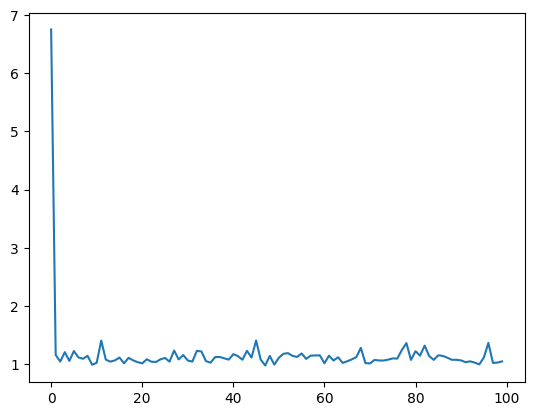

In [ ]:
plt.plot(history)

The following command is important command to check the parameters of the model in `torch.nn.Linear`, and identify the name of each parameter. In this example, we can use parameters using the following commands

```
print(model.weight, model.bias)
```

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([[-0.7431,  1.6765]])),
             ('bias', tensor([-0.4042]))])

In [ ]:
model.weight

Parameter containing:
tensor([[-0.7431,  1.6765]], requires_grad=True)

In [ ]:
model.bias

Parameter containing:
tensor([-0.4042], requires_grad=True)

If you want to do gradient descent without using `torch.optimizer.SGD`, you can use the following commands:

```
model.weight.data = model.weight.data - lr * model.weight.grad

model.bias.data = model.bias.data - lr * model.bias.grad

```

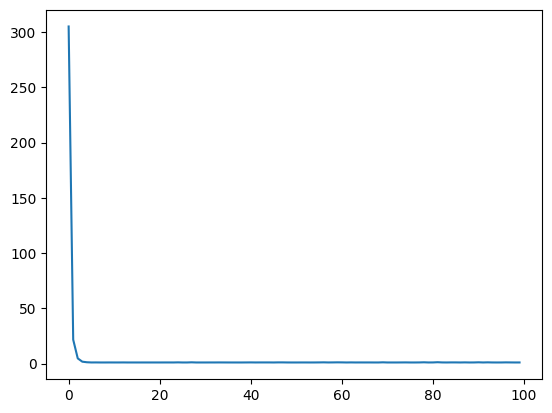

In [ ]:
plt.plot(history)

## Exercise 3.1.2:

Repeat the above training procedure with

   1> batch size equals 4
   
   2> Use `forward = torch.nn.Linear(1, 1, bias=False)` and `bias=torch.tensor(torch.randn([1]), requires_grad=True`. In this case, we define
   ```
yhat = forward(x) + bias
   ```
   Here, you may use `X` instead of `XX` and redefine `trainloader`.
   3> After training, calculate `yhat` corresponding `X=2.0`.

   4> Repeat the above procedures without using `torch.optim.SGD`.

### Exercise 3.1.3



Using `Auto` data set in `ISLP` package, excute the following data processing procedures

- Create the design matrix `X` of shape `[n,2]` where the first column is column of ones and the second column is `horsepower`.

- Standardize `X` and save it into `XX` so that the mean of the second column is zero and the variance of the second column is one.

- Define `Y` as `mpg`.

Now with `XX` (or equivalently `X`) and `Y`, you want to train the following model

```
Yhat = XX @ beta
```
via the following minimization problem
```
torch.mean( (Y-Yhat)**2 )
```
where `beta` is `[2,1]` column parameters. Train the model using the stochastic batch learning with the various instructions. For each problem, you also calculate `Yhat` when `horsepower=2.0`.

1> First method
- Define the loss function
- Use `model = torch.nn.Linear(2,1, bias=False) ` to define the model.
- Use `torch.optim.SGD` to define your optimizer.

2> Second method
- Define the loss function
- Use `model = torch.nn.Linear(1,1, bias=True)` to define the model.
- Do not use `torch.optim.SGD` to do gradient descent.

3> Third method
- Define the loss function
- Use `model = torch.nn.Linear(1,1, bias=False) + beta0` and `beta0 = torch.tensor(torch.randn([1], requires_grad=True)` to define the model.
- Do not use `torch.optim.SGD` to do gradient descent.

4> Fourth method
- Define the loss function
- Use `model = torch.nn.Linear(1,1, bias=False) + beta0` and `beta0 = torch.tensor(torch.randn([1], requires_grad=True)` to define the model.
- Use `torch.optim.SGD` to do gradient descent.




In [ ]:
!pip install ISLP

In [10]:
import ISLP
import torch
from torch.utils.data import DataLoader, TensorDataset

In [18]:
Auto = ISLP.load_data("Auto")

X = torch.tensor(Auto["horsepower"]).to(torch.float32).reshape(-1,1)
Y = torch.tensor(Auto["mpg"]).to(torch.float32).reshape(-1,1)

X_mean = torch.mean(X, axis=0)
X_std = torch.std(X, axis=0)
XX = (X - X_mean)/X_std

# 4. Custom layer

Repeat the above procedure with user defined layer.

## 4.1. Layers without Parameters

To start, we construct a custom layer that does not have any parameters of its own. The following CenteredLayer class simply subtracts the mean from its input. To build it, we simply need to inherit from the base layer class and implement the forward propagation function.

In [13]:
class CenteredLayer(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean()

Let’s verify that our layer works as intended by feeding some data through it.

In [14]:
layer = CenteredLayer()
layer(torch.tensor([1.0, 2, 3, 4, 5]))

tensor([-2., -1.,  0.,  1.,  2.])

## 4.2. Layers with Parameters

Now that we know how to define simple layers, let’s move on to defining layers with parameters that can be adjusted through training. We can use built-in functions to create parameters, which provide some basic housekeeping functionality. In particular, they govern access, initialization, sharing, saving, and loading model parameters. This way, among other benefits, we will not need to write custom serialization routines for every custom layer.

Now let’s implement our own version of the `Linear` layer. Recall that this layer requires two parameters, one to represent the weight and the other for the bias. This layer requires two input arguments: `in_units` and `units`, which denote the number of inputs and outputs, respectively.

Mathematically, we have

```
weight = torch.tensor( torch.randn([in_units, units]), requires_grad=True)
```
and
```
bias = torch.tensor( torch.randn([units]), requires_grad=True)
```

Hence, we are aiming to create

`Yhat = X @ W + b`

where `X` is `[n,in_units]` matrix.

However, in `torch.nn.Module`, the following command
```
weight = torch.tensor( torch.randn([in_units, units]), requires_grad=True)
```
should be written as
```
weight = torch.nn.Parameter( torch.randn([in_units, units]))
```

The following is the code how to define `torch.nn.Linear` layer.





In [18]:
class MyLinear(torch.nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.randn(in_units, units))
        self.bias = torch.nn.Parameter(torch.randn(units,))

    def forward(self, X):
        temp = X @ self.weight + self.bias
        return temp

Now, let's verify that it is working as intended.

In [24]:
model = MyLinear(2,1)
print(model.weight)
print(model.state_dict())

Parameter containing:
tensor([[-0.1197],
        [ 1.6899]], requires_grad=True)
OrderedDict([('weight', tensor([[-0.1197],
        [ 1.6899]])), ('bias', tensor([-0.0710]))])


In [25]:
model(torch.tensor([[1.0, 2.0]]))

tensor([[3.1891]], grad_fn=<AddBackward0>)

## 4.2.1 Using torch.nn module to construct and train the model.

In [23]:
class linear_regression(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.bias = torch.nn.Parameter(torch.randn([output_size]))
    self.weight = torch.nn.Parameter(torch.randn([input_size,output_size]))
  def forward(self,x):
    yhat = x @ self.weight + self.bias
    return yhat

model = linear_regression(1,1)

Note that the above can be equivalently written as follows. In this case, try

```
class linear_regression(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.model_1 = torch.nn.Linear(input_size, output_size, bias=False)
    self.bias = torch.nn.Parameter(torch.randn([output_size]))
  def forward(self,x):
    yhat = self.model_1(x) + self.bias
    return yhat

model = linear_regression(2,1)
```

Here, try `model.state_dict()` in each definition. Can you see the difference in parameter names?

In [24]:
model.state_dict()

OrderedDict([('bias', tensor([0.4139])), ('weight', tensor([[0.8770]]))])

In [25]:
dataset = TensorDataset(XX,Y)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [26]:
iters = 30
history = []
for epoch in range(iters):
  current_epoch_loss = 0
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    current_epoch_loss += loss.item()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  history.append(current_epoch_loss)

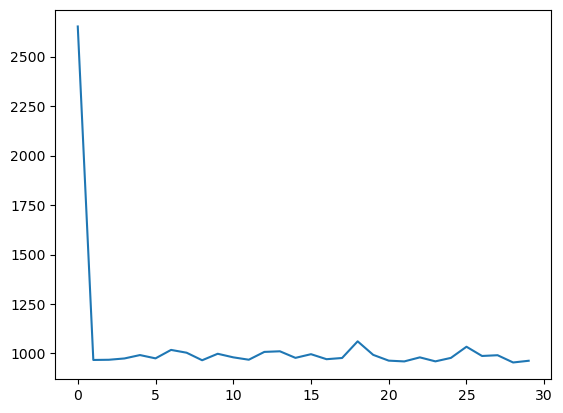

In [28]:
import matplotlib.pyplot as plt
plt.plot(history)

## Exercise 4.2.2:

Visit `Auto` exercise using custom layer.